# Module 2.4 — Probability of Loss Over Finite Horizons
### Pre-Simulation Beliefs
1. Positive Expected value implies high chance of profit.
   - if a system has edge, the probability of being profitable should be comfortably above 50%, even early on.
2. Time fixes everything quickly.
   - given enough trades, outcomes should stabilize relatively fast.
3. Loss after "many" trades implies a problem.
   - Being down after 50-100 trades whould feel like strong evidence something is wrong.
     

In [132]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.55
n_trades = 1000
n_agents = 1000

In [137]:
sequences = np.where(
    np.random.rand(n_agents, n_trades) < p,
    1,
    -1
)
paths = np.cumsum(sequences, axis = 1)

N = [5,10, 25, 50, 75, 100,125, 150, 200, 300,400,500, 1000]

loss_probs = []
for i in N:
    thres_path = paths[:, :i]
    final_equity = thres_path[:, -1]

    loosing_patch = np.where(
        final_equity < 0,
        1,
        0
    )
    prob_of_loosing_patch = round(loosing_patch.mean()*100, 2)
    loss_probs.append(prob_of_loosing_patch)
    print(f"Probability of end up 'Negative' among all agents inside the {i} trade period = {prob_of_loosing_patch}%")


Probability of end up 'Negative' among all agents inside the 5 trade period = 40.5%
Probability of end up 'Negative' among all agents inside the 10 trade period = 26.3%
Probability of end up 'Negative' among all agents inside the 25 trade period = 28.7%
Probability of end up 'Negative' among all agents inside the 50 trade period = 18.0%
Probability of end up 'Negative' among all agents inside the 75 trade period = 17.6%
Probability of end up 'Negative' among all agents inside the 100 trade period = 10.9%
Probability of end up 'Negative' among all agents inside the 125 trade period = 11.5%
Probability of end up 'Negative' among all agents inside the 150 trade period = 8.4%
Probability of end up 'Negative' among all agents inside the 200 trade period = 4.4%
Probability of end up 'Negative' among all agents inside the 300 trade period = 3.0%
Probability of end up 'Negative' among all agents inside the 400 trade period = 1.8%
Probability of end up 'Negative' among all agents inside the 500

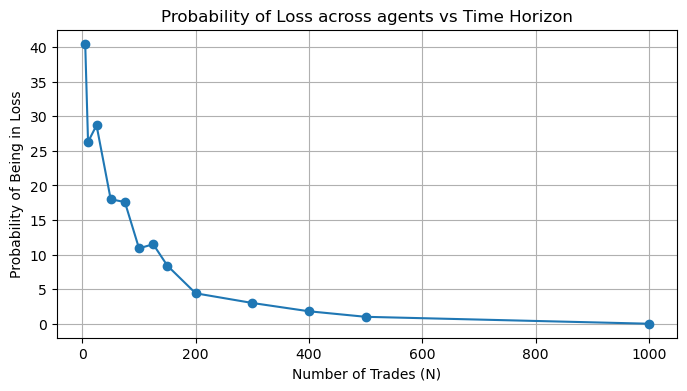

In [138]:
plt.figure(figsize=(8, 4))
plt.plot(N, loss_probs, marker='o')
plt.xlabel("Number of Trades (N)")
plt.ylabel("Probability of Being in Loss")
plt.title("Probability of Loss across agents vs Time Horizon")
plt.grid(True)
plt.show()


# Observation
### Even in a positive expectancy system, the probability of being net negative remains substantial across short and intermediate horizons. Loss probabilities decline only gradually with time and may temporarily increase as variance unfolds before the edge dominates. This demonstrates that positive expected value does not imply a high probability of profit in the short run, and that early or intermediate losses are statistically normal rather than diagnostic of system failure.

### This simulation also shows that, within the same winning system, some agents require significantly longer horizons to reach profitability than others. These delayed convergence paths are not errors or failures, but natural outcomes of variance. Persisting through such paths demands endurance far beyond what comparative or peer-based evaluation would justify, making the psychological burden asymmetric across agents despite identical skill and rules.

### Therefore, short-horizon evaluation of a positive expectancy system systematically overweights variance and underweights edge, leading to premature abandonment by agents who are statistically unlucky rather than incorrect.